In [ ]:
# Mounting with google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Importing libraries
import pandas
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Importing the dataset
data = pandas.read_csv('/content/gdrive/My Drive/Datasets/Drug macromolecule.csv', engine='python')
# Shape of dataset
data.shape

(141401, 14)

In [ ]:
# Viewing first 5 rows of the dataframe
data.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0


In [ ]:
# Data Cleaning
# Checking duplicate values
data.duplicated().sum()

0

In [ ]:
# Checking null values in dataframe
data.isnull().sum()

structureId                     0
classification                  2
experimentalTechnique           0
macromoleculeType            3765
residueCount                    0
resolution                  12812
structureMolecularWeight        0
crystallizationMethod       45159
crystallizationTempK        44362
densityMatthews             16677
densityPercentSol           16652
pdbxDetails                 22867
phValue                     36291
publicationYear             23799
dtype: int64

In [ ]:
# Dropping null values as they are too much
data.dropna(inplace= True)

In [ ]:
# Checking null values again
data.isnull().sum()

structureId                 0
classification              0
experimentalTechnique       0
macromoleculeType           0
residueCount                0
resolution                  0
structureMolecularWeight    0
crystallizationMethod       0
crystallizationTempK        0
densityMatthews             0
densityPercentSol           0
pdbxDetails                 0
phValue                     0
publicationYear             0
dtype: int64

In [ ]:
# New shape of dataframe
data.shape

(65886, 14)

In [ ]:
# Brief information about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65886 entries, 3 to 141172
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   structureId               65886 non-null  object 
 1   classification            65886 non-null  object 
 2   experimentalTechnique     65886 non-null  object 
 3   macromoleculeType         65886 non-null  object 
 4   residueCount              65886 non-null  int64  
 5   resolution                65886 non-null  float64
 6   structureMolecularWeight  65886 non-null  float64
 7   crystallizationMethod     65886 non-null  object 
 8   crystallizationTempK      65886 non-null  float64
 9   densityMatthews           65886 non-null  float64
 10  densityPercentSol         65886 non-null  float64
 11  pdbxDetails               65886 non-null  object 
 12  phValue                   65886 non-null  float64
 13  publicationYear           65886 non-null  float64
dtypes: fl

In [ ]:
# Correlation matrix
correlation= data.corr().round(decimals= 3)
correlation

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear
residueCount,1.000,0.298,0.921,-0.008,0.156,0.179,0.023,0.057
resolution,0.298,1.000,0.250,-0.011,0.483,0.479,0.040,0.001
structureMolecularWeight,0.921,0.250,1.000,-0.010,0.137,0.149,0.023,0.045
crystallizationTempK,-0.008,-0.011,-0.010,1.000,-0.075,-0.080,-0.007,0.018
densityMatthews,0.156,0.483,0.137,-0.075,1.000,0.924,0.006,0.011
densityPercentSol,0.179,0.479,0.149,-0.080,0.924,1.000,0.010,0.013
phValue,0.023,0.040,0.023,-0.007,0.006,0.010,1.000,0.023
publicationYear,0.057,0.001,0.045,0.018,0.011,0.013,0.023,1.000


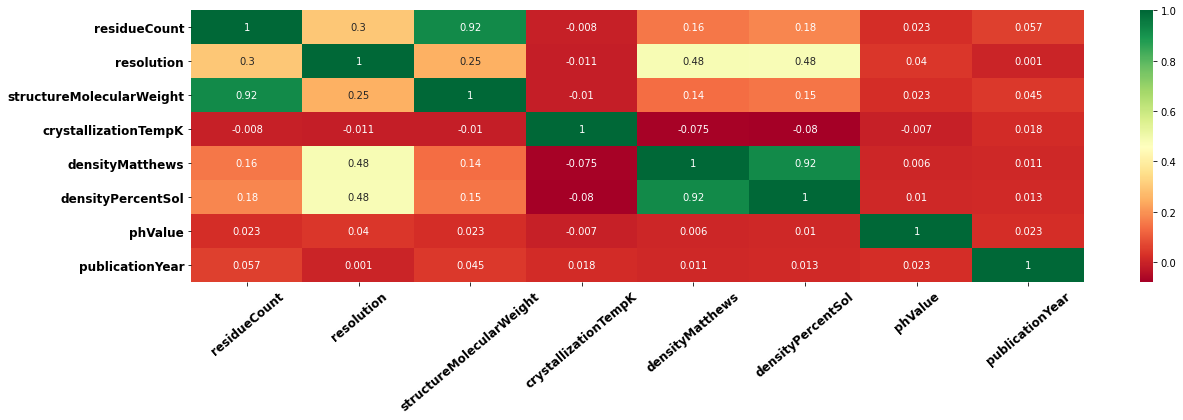

In [ ]:
# Correlation heatmap
plt.figure(figsize= (20, 5))
seaborn.heatmap(correlation, annot= True, cmap= 'RdYlGn')
plt.xticks(rotation= 40, fontsize= 12, fontweight= 'bold')
plt.yticks(fontsize= 12, fontweight= 'bold')
plt.show()

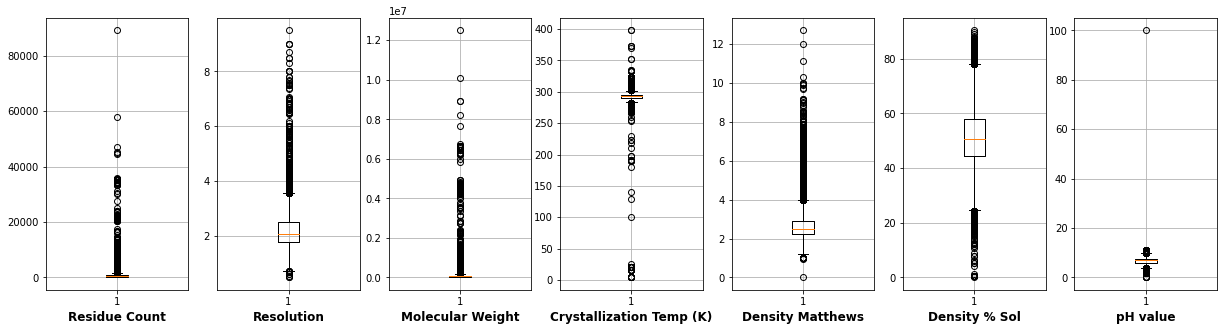

In [ ]:
# Boxplot for several variables
plt.figure(figsize= (21, 5))
plt.subplot(1,7, 1)
plt.boxplot(data['residueCount'])
plt.grid()
plt.xlabel('Residue Count', fontsize= 12, fontweight= 'bold')
plt.subplot(1,7, 2)
plt.boxplot(data['resolution'])
plt.grid()
plt.xlabel('Resolution', fontsize= 12, fontweight= 'bold')
plt.subplot(1,7, 3)
plt.boxplot(data['structureMolecularWeight'])
plt.grid()
plt.xlabel('Molecular Weight', fontsize= 12, fontweight= 'bold')
plt.subplot(1,7, 4)
plt.boxplot(data['crystallizationTempK'])
plt.grid()
plt.xlabel('Crystallization Temp (K)', fontsize= 12, fontweight= 'bold')
plt.subplot(1,7, 5)
plt.boxplot(data['densityMatthews'])
plt.grid()
plt.xlabel('Density Matthews', fontsize= 12, fontweight= 'bold')
plt.subplot(1,7, 6)
plt.boxplot(data['densityPercentSol'])
plt.grid()
plt.xlabel('Density % Sol', fontsize= 12, fontweight= 'bold')
plt.subplot(1,7, 7)
plt.boxplot(data['phValue'])
plt.grid()
plt.xlabel('pH value', fontsize= 12, fontweight= 'bold')
plt.show()

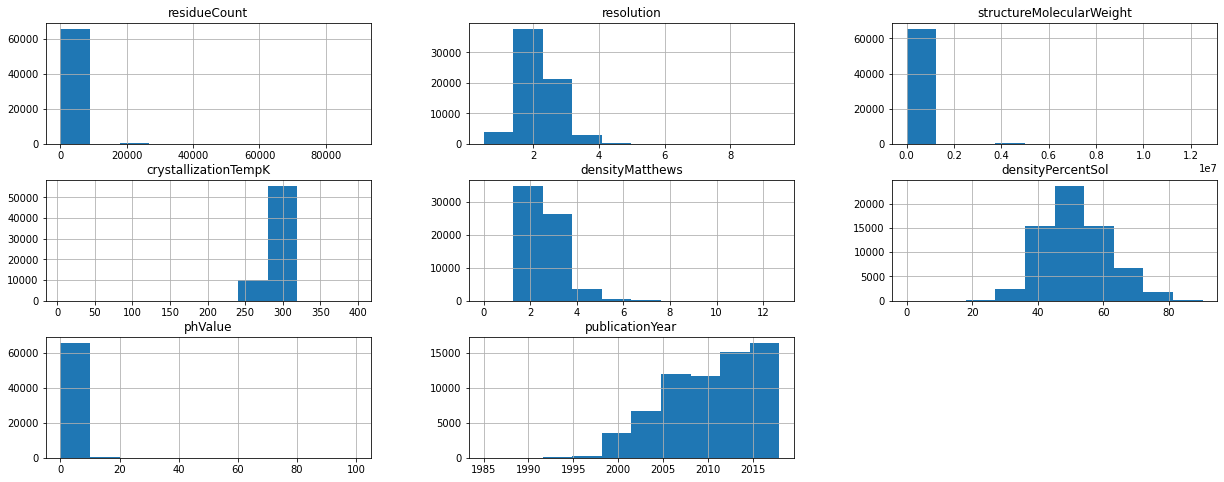

In [ ]:
# Histogram plot
data.hist(figsize= (21, 8))
plt.show()

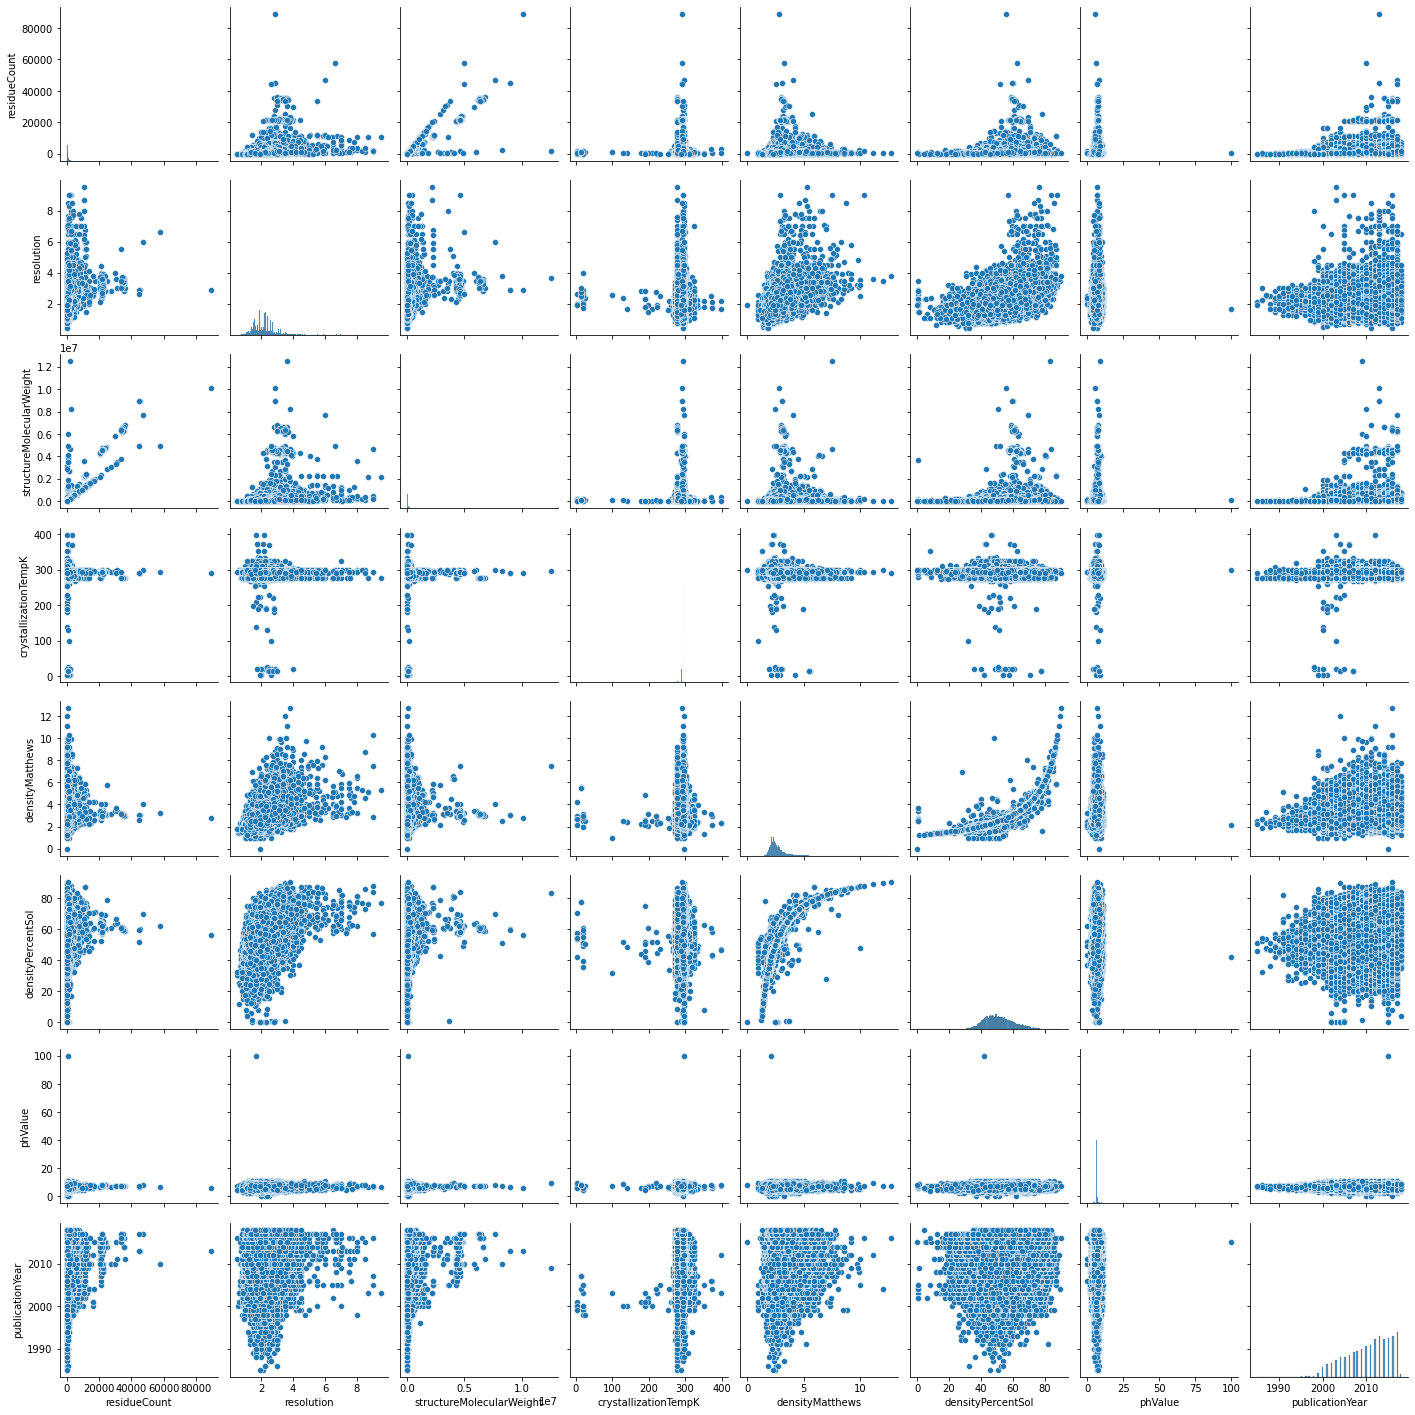

In [ ]:
# Pairplot
seaborn.pairplot(data)
plt.show()

In [ ]:
# Data shuffling : to remove biasness in data
data= data.sample(frac= 1)

In [ ]:
# Defining independent and dependent sets
features= ['residueCount', 'resolution', 'structureMolecularWeight', 'crystallizationTempK', 'densityMatthews', 'densityPercentSol', 'phValue']
target= ['macromoleculeType']
x= data[features]     # Independent set
y= data[target]     # Dependent set

In [ ]:
# Splitting into training and testing sets
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.1, random_state= 1)
print('Independent training set shape is :', x_train.shape)
print('Independent testing set shape is :', x_test.shape)
print('Dependent training set shape is :', y_train.shape)
print('Dependent testing set shape is :', y_test.shape)

Independent training set shape is : (59297, 7)
Independent testing set shape is : (6589, 7)
Dependent training set shape is : (59297, 1)
Dependent testing set shape is : (6589, 1)


In [ ]:
# Applying Logistic Regression
import warnings
warnings.filterwarnings('ignore') 

lr= LogisticRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
lr_accuracy= ((accuracy_score(y_test, y_pred)) * 100).round(decimals= 3)
print('Training set accuracy acore % is : ', ((accuracy_score(y_train, lr.predict(x_train))) * 100).round(decimals= 3) )
print('Testing set accuracy acore % is : ', lr_accuracy)
print('Confusion matrix is :', '\n', confusion_matrix(y_test, y_pred))
print()
print('Classification report is :', '\n',  classification_report(y_test, y_pred))

Training set accuracy acore % is :  92.811
Testing set accuracy acore % is :  92.442
Confusion matrix is : 
 [[   0    0   61    0    0    0    0]
 [   0    0    5    0    0    0    0]
 [   0    0 6064    9    0    5    0]
 [   0    0  266    0    0    1    0]
 [   0    0   18    0    0    0    0]
 [   0    0   87    0    0   27    0]
 [   0    0   46    0    0    0    0]]

Classification report is : 
                         precision    recall  f1-score   support

                   DNA       0.00      0.00      0.00        61
        DNA/RNA Hybrid       0.00      0.00      0.00         5
               Protein       0.93      1.00      0.96      6078
           Protein#DNA       0.00      0.00      0.00       267
Protein#DNA/RNA Hybrid       0.00      0.00      0.00        18
           Protein#RNA       0.82      0.24      0.37       114
                   RNA       0.00      0.00      0.00        46

              accuracy                           0.92      6589
             mac

In [ ]:
# Applying Decision Tree Classifier
dtc= DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred= dtc.predict(x_test)
dtc_accuracy= ((accuracy_score(y_test, y_pred)) * 100).round(decimals= 3)
print('Training set accuracy acore % is : ', ((accuracy_score(y_train, dtc.predict(x_train))) * 100).round(decimals= 3) )
print('Testing set accuracy acore % is : ', dtc_accuracy)
print('Confusion matrix is :', '\n', confusion_matrix(y_test, y_pred))
print()
print('Classification report is :', '\n',  classification_report(y_test, y_pred))

Training set accuracy acore % is :  100.0
Testing set accuracy acore % is :  95.538
Confusion matrix is : 
 [[  47    0    0    1    0    0   13]
 [   1    1    0    0    0    0    3]
 [   2    0 5963   68   11   34    0]
 [   0    0   73  173    7   14    0]
 [   0    0    4    0   14    0    0]
 [   0    0   34   15    3   60    2]
 [   7    1    0    1    0    0   37]]

Classification report is : 
                         precision    recall  f1-score   support

                   DNA       0.82      0.77      0.80        61
        DNA/RNA Hybrid       0.50      0.20      0.29         5
               Protein       0.98      0.98      0.98      6078
           Protein#DNA       0.67      0.65      0.66       267
Protein#DNA/RNA Hybrid       0.40      0.78      0.53        18
           Protein#RNA       0.56      0.53      0.54       114
                   RNA       0.67      0.80      0.73        46

              accuracy                           0.96      6589
             macr

In [ ]:
# Checking our model prediction accuracy by using values from the dataframe
# Using Decision tree classifier due to its high accuracy score
residueCount= data['residueCount'][150]
resolution= data['resolution'][150]
structureMolecularWeight= data['structureMolecularWeight'][150]
crystallizationTempK= data['crystallizationTempK'][150]
densityMatthews= data['densityMatthews'][150]
densityPercentSol= data['densityPercentSol'][150]
phValue= data['phValue'][150]
input= [[residueCount, resolution, structureMolecularWeight, crystallizationTempK, densityMatthews, densityPercentSol, phValue]]
prediction= dtc.predict(input)
print('Actual value of target (Macromolecule type) from the dataframe is :', data['macromoleculeType'][150] )
print('Predicted value of target (Macromolecule type) from the model is :', prediction )

Actual value of target (Macromolecule type) from the dataframe is : DNA
Predicted value of target (Macromolecule type) from the model is : ['DNA']


In [ ]:
# Again checking our model prediction accuracy (to confirm) by using values from the dataframe
# Using Decision tree classifier due to its high accuracy score
residueCount= data['residueCount'][900]
resolution= data['resolution'][900]
structureMolecularWeight= data['structureMolecularWeight'][900]
crystallizationTempK= data['crystallizationTempK'][900]
densityMatthews= data['densityMatthews'][900]
densityPercentSol= data['densityPercentSol'][900]
phValue= data['phValue'][900]
input= [[residueCount, resolution, structureMolecularWeight, crystallizationTempK, densityMatthews, densityPercentSol, phValue]]
prediction= dtc.predict(input)
print('Actual value of target (Macromolecule type) from the dataframe is :', data['macromoleculeType'][900] )
print('Predicted value of target (Macromolecule type) from the model is :', prediction )

Actual value of target (Macromolecule type) from the dataframe is : Protein
Predicted value of target (Macromolecule type) from the model is : ['Protein']


In [ ]:
# Checking our model prediction accuracy by using random values
# Using Decision tree classifier due to its high accuracy score
residueCount= 371
resolution= 2.53
structureMolecularWeight= 48342
crystallizationTempK= 293
densityMatthews= 2.61
densityPercentSol= 52.96
phValue= 7.3
input= [[residueCount, resolution, structureMolecularWeight, crystallizationTempK, densityMatthews, densityPercentSol, phValue]]
prediction= dtc.predict(input)
print('Predicted value of target (Macromolecule type) from the model is :', prediction )

Predicted value of target (Macromolecule type) from the model is : ['Protein#DNA']


In [ ]:
from termcolor import colored
print( colored('Thank you for reading this.', 'green', attrs= ['bold'] ) ) 

Thank you for reading this.
